In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [11]:
iris = datasets.load_iris()

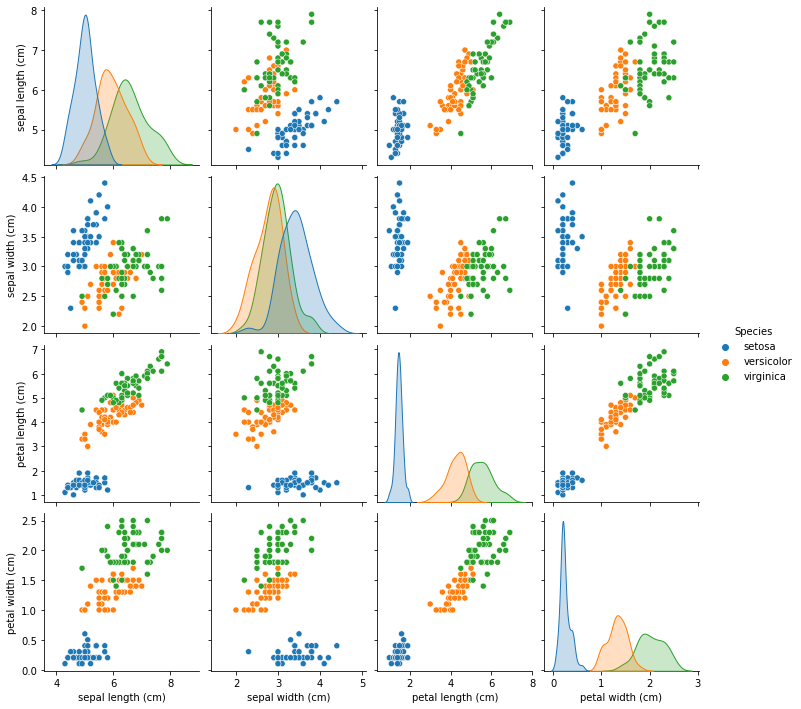

In [13]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['Species'] = np.array([iris.target_names[cls] for cls in iris.target])
sns.pairplot(data, hue = 'Species')

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [18]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size = 0.3,
                                                   stratify = iris.target,
                                                   random_state = 42)
model = clf.fit(X_train, y_train)

In [20]:
preds = model.predict(X_test)
print("Accuracy: {:.2f}".format(accuracy_score(preds, y_test)))

Accuracy: 0.89


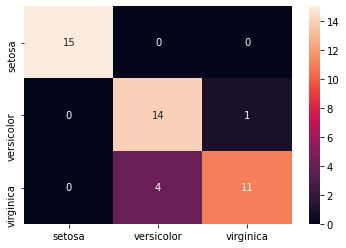

In [24]:
confusion_scores = confusion_matrix(y_test, preds)
confusion_df = pd.DataFrame(confusion_scores, columns = iris.target_names, index = iris.target_names)
sns.heatmap(confusion_df, annot=True)

In [28]:
feature_importance = list(zip(iris.feature_names, model.feature_importances_))
feature_df = pd.DataFrame(feature_importance, columns = ['feature_name','RF_importance'])
feature_df

,feature_name,RF feature
0,sepal length (cm),0.120608
1,sepal width (cm),0.024273
2,petal length (cm),0.400227
3,petal width (cm),0.454892


In [29]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
gbc = GradientBoostingClassifier(n_estimators = 100, random_state = 42)
model = gbc.fit(X_train, y_train)
preds = model.predict(X_test)
print("Accuracy: {:.2f}".format(accuracy_score(preds, y_test)))

Accuracy: 0.93


In [34]:
feature_df['GBC_importance'] = model.feature_importances_
feature_df

,feature_name,RF feature,GBC_importance
0,sepal length (cm),0.120608,0.009340
1,sepal width (cm),0.024273,0.011578
2,petal length (cm),0.400227,0.352421
3,petal width (cm),0.454892,0.626662


In [35]:
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}